# Random Subsampling Analysis – 20 Interferometer Positions

This notebook evaluates the impact of random subsampling at 5% measurement density (20 positions out of 400) on the reconstructed nano-FTIR interferograms and spectra.

---

## 1. Objective

Simulate random subsampling to investigate the minimum number of interferometer positions needed to achieve reliable reconstruction of hyperspectral data while significantly reducing measurement time.

## 2. Load Data

Load the full interferogram dataset and associated metadata.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.fftpack import fft, fftfreq, rfft, ifft, fft2
from scipy.io import loadmat
from scipy.stats import kde
from matplotlib import colors
from scipy.signal import blackman


In [2]:
spacialsmoothed1 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_02.11.2020_14.23.48.mat ') 
Reko1=spacialsmoothed1["RekoCSspatialsmoothed"]
spacialsmoothed2 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_02.11.2020_14.30.22.mat ') 
Reko2=spacialsmoothed2["RekoCSspatialsmoothed"]
spacialsmoothed3 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_02.11.2020_14.35.18.mat ') 
Reko3=spacialsmoothed3["RekoCSspatialsmoothed"]
spacialsmoothed4 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_02.11.2020_14.39.54.mat ') 
Reko4=spacialsmoothed4["RekoCSspatialsmoothed"]
spacialsmoothed5 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_02.11.2020_14.44.09.mat ') 
Reko5=spacialsmoothed5["RekoCSspatialsmoothed"]
spacialsmoothed6 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_02.11.2020_14.47.51.mat ') 
Reko6=spacialsmoothed6["RekoCSspatialsmoothed"]
spacialsmoothed7 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\Results\\data_RekoCSspatialsmoothed_02.11.2020_15.02.54.mat ') 
Reko7=spacialsmoothed7["RekoCSspatialsmoothed"]
spacialsmoothed8 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_02.11.2020_15.07.51.mat ') 
Reko8=spacialsmoothed8["RekoCSspatialsmoothed"]
spacialsmoothed9 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_02.11.2020_15.13.57.mat ') 
Reko9=spacialsmoothed9["RekoCSspatialsmoothed"]
spacialsmoothed10 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_02.11.2020_15.17.54.mat ') 
Reko10=spacialsmoothed10["RekoCSspatialsmoothed"]
spacialsmoothed11 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_02.11.2020_15.22.05.mat ') 
Reko11=spacialsmoothed11["RekoCSspatialsmoothed"]
spacialsmoothed12 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_02.11.2020_15.28.02.mat ') 
Reko12=spacialsmoothed12["RekoCSspatialsmoothed"]
spacialsmoothed13 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_02.11.2020_15.32.07.mat ') 
Reko13=spacialsmoothed13["RekoCSspatialsmoothed"]
spacialsmoothed14 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_02.11.2020_15.36.09.mat ') 
Reko14=spacialsmoothed14["RekoCSspatialsmoothed"]
spacialsmoothed15 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_02.11.2020_15.40.09.mat ') 
Reko15=spacialsmoothed15["RekoCSspatialsmoothed"]
spacialsmoothed16 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_02.11.2020_15.44.44.mat ') 
Reko16=spacialsmoothed16["RekoCSspatialsmoothed"]
spacialsmoothed17 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_02.11.2020_15.48.40.mat ') 
Reko17=spacialsmoothed17["RekoCSspatialsmoothed"]
spacialsmoothed18 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_02.11.2020_15.52.19.mat ') 
Reko18=spacialsmoothed18["RekoCSspatialsmoothed"]
spacialsmoothed19 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_02.11.2020_15.56.35.mat ') 
Reko19=spacialsmoothed19["RekoCSspatialsmoothed"]
spacialsmoothed20 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_02.11.2020_16.00.56.mat ') 
Reko20=spacialsmoothed20["RekoCSspatialsmoothed"]
#Reko=spacialsmoothed["RekoCS"]
print(Reko1.shape)


(55, 55, 400)


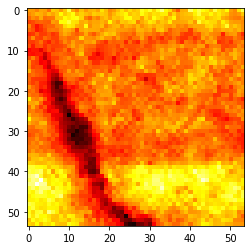

In [3]:
zweiD = np.zeros((54,54))
for i in range (0,54):
    for j in range (0,54):
        zweiD[i,j]= abs(Reko1[i,j,200])  
plt.imshow(zweiD, cmap='hot', interpolation='none')
plt.show()
#datafull0 = loadmat('C:\\Users\Barbara\\Nextcloud\\CompressedSensing\Scripte\Hardware_implementation\Programm complett\Results\data_full_02.11.2020_14.23.48.mat')

#datafull=datafull0["data_full"]
#datafull.shape
#zweiDb = np.zeros((54,54))
#for i in range (0,54):
#    for j in range (0,54):
#        zweiDb[i,j]= abs(datafull[i,j,200])  
#plt.imshow(zweiDb, cmap='hot', interpolation='none')
#plt.show()

In [4]:
def Filter(Filtertype, Resolution): #Resolution=Length complex data
    if Filtertype==1: #blackmann-Harris-3-Term
        b=np.zeros(400*3)
        Filtered=np.zeros(400*3)
        for z in range (199):
            b[z]=np.cos(np.pi*(z)/(Resolution/2))
            Filtered [z]= 0.42323 + 0.49755*b[z] + 0.07922*np.cos(2*np.pi*(z)/(Resolution/2))  
            #b[z]=np.cos(np.pi*(z-Resolution/2))/(Resolution/2))
            #Filtered [z]= 0.42323 + 0.49755*b[z] + 0.07922*np.cos(2*np.pi*(z-Resolution/2))/(Resolution/2)) 
        for z in range (200,400):
            b[z+800]=np.cos(np.pi*(z)/(Resolution/2))
            Filtered [z+800]= 0.42323 + 0.49755*b[z+800] + 0.07922*np.cos(2*np.pi*(z+800)/(Resolution/2))  
        
        return Filtered
    if filtertype==2: #blackmann with gap
        gap = 0.4
        return blackManFn(z/Resolution, gap)

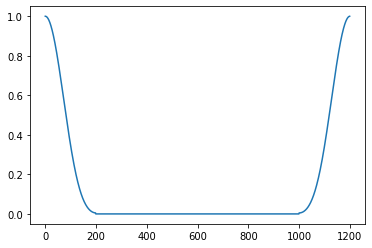

In [5]:
plt.plot(Filter(1,400))

In [6]:
def blackManFn(x, gap):
    if x >=gap and x <= (1 - gap):
        a=np.pi*((x - gap)*(0.5/(-gap + 0.5)) - 1/2)/(1/2)
        b=0.42323 + 0.49755*np.cos(a) + 0.07922*np.cos(2*a)
        return b
    if   x <=  gap or x >= 1 - gap:
        return 0.0049


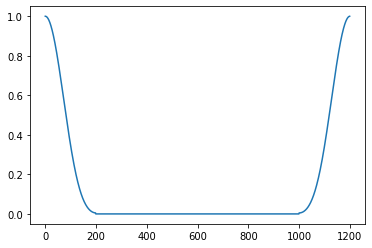

In [7]:
plt.plot(Filter(1,400))
#plt.plot( Filter(1,400*zerofilling))

In [8]:
#Signalregion 1 
a=20 #good
b=13 #good

In [9]:
#Signalregion 2
a=18 #good
b=7 #good

In [10]:
#Hintergrund
a=20 #good
b=13 #good

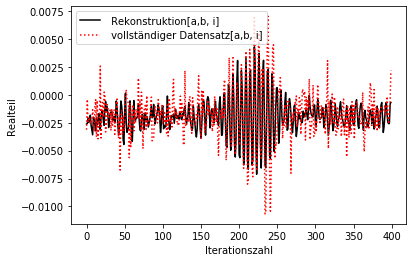

In [11]:
fulldata = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_full_02.11.2020_14.23.48.mat ') 
data_full=fulldata["data_full"]

plt.plot(np.real(Reko12[a,b]), 'k-',label=' Rekonstruktion[a,b, i]')
plt.plot(np.real(data_full[a,b]), 'r:',label=' vollständiger Datensatz[a,b, i]')

plt.legend()

#plt.axis([0.00115, 0.0013, 0,0.20 ])
plt.xlabel('Iterationszahl')
plt.ylabel('Realteil')

plt.show() 

In [12]:
SNR1=np.zeros((20),dtype=complex)
SNR2=np.zeros((20),dtype=complex)

Text(0, 0.5, 'abs Amplitude in a.u.')

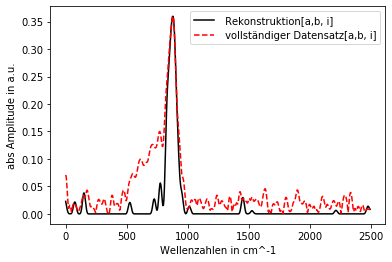

In [13]:
zerofilling=3

RekoA=np.zeros((400,),dtype = complex)
FullA=np.zeros((400,),dtype = complex)

zerof=np.zeros((800,),dtype = complex)
'''wnZFVals = 
  Table[(j - 
      1)*1/(2*(zerofilling + 1)*
       importDataScanS/10000.), {j, (zerofilling + 1)*dimDat[[2]]}];'''
wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x

for i in range (0,399):
            RekoA[i]=(Reko12[a,b, i])
            FullA[i]=(data_full[a,b, i])
            
offsetReko1 = np.mean(RekoA[369:399,])               

offsetReko=np.ones((400,),dtype = complex)*offsetReko1
offReko= np.subtract(RekoA,offsetReko)

offRekozerofilling= np.concatenate([offReko,zerof])
wrapindexReko =230                                    
wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links

filReko = Filter(1,400)*wrapReko

ftReko = fft(filReko)
ftRekohalve=ftReko[0:599]


offsetFull1 = np.mean(FullA[369:399,])               

offsetFull=np.ones((400,),dtype = complex)*offsetFull1
offFull= np.subtract(FullA,offsetFull)

offFullzerofilling= np.concatenate([offFull,zerof])
wrapindexFull =230                                    
wrapFull=np.roll(offFullzerofilling,-wrapindexFull)   # rollt nach links

filFull = Filter(1,400)*wrapFull

ftFull = fft(filFull)
ftFullhalve=ftFull[0:599]

plt.plot(wnVal[0:599,], np.absolute(ftRekohalve),'k-',label=' Rekonstruktion[a,b, i]')
plt.plot(wnVal[0:599,], np.absolute(ftFullhalve),'r--',label=' vollständiger Datensatz[a,b, i]')
plt.legend()

#plt.axis([1000, 1199, -0.008,0.007 ])
plt.xlabel('Wellenzahlen in cm^-1')
plt.ylabel('abs Amplitude in a.u.')
#pos zwischen 800 und 900 wnVal

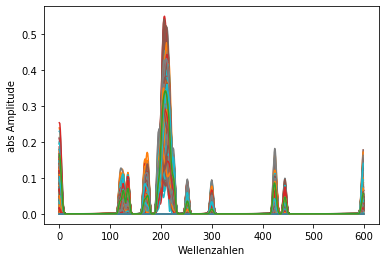

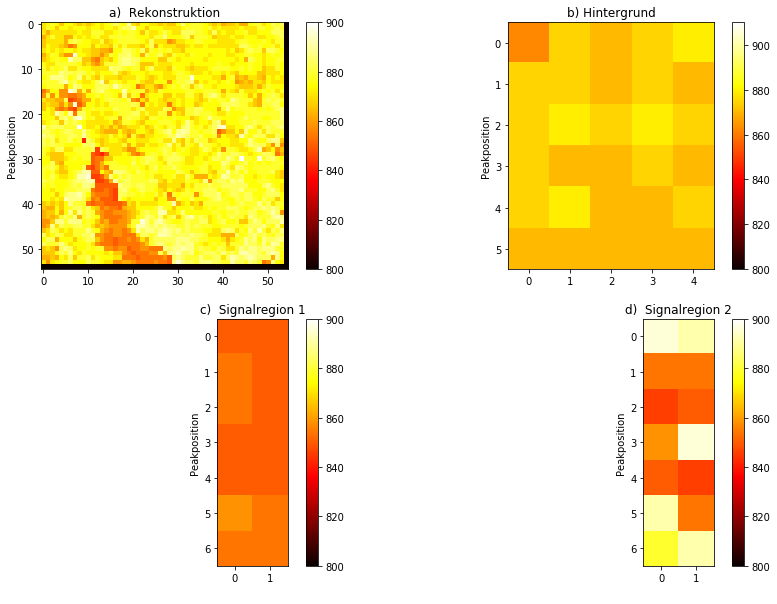

In [14]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))
'''wnZFVals = 
  Table[(j - 
      1)*1/(2*(zerofilling + 1)*
       importDataScanS/10000.), {j, (zerofilling + 1)*dimDat[[2]]}];'''
wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko1[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        #print(offsetReko1)
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        #print(np.subtract(RekoA,-offsetReko)) 
        #plt.plot (np.real(offReko))
        offRekozerofilling= np.concatenate([offReko,zerof])
        #print(offRekozerofilling)
        #plt.plot (np.real(offRekozerofilling))
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #print (wrapReko)
        #plt.plot (np.real(wrapReko))
        plt.plot(np.zeros(600))
        #filtering
        filReko = Filter(1,400)*wrapReko
        #print(filReko)
        #plt.plot(np.absolute(filReko))
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]
plt.plot(np.absolute(ftRekohalve))

#plt.axis([1000, 1199, -0.008,0.007 ])
plt.xlabel('Wellenzahlen')
plt.ylabel('abs Amplitude')
#pos zwischen 800 und 900 wnVal

plt.subplots_adjust(wspace=0.5,hspace=0.5)

plt.figure(figsize=(14,10))

RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()


plt.subplot(221)
plt.imshow(pos_Reko_Max,vmin=800, vmax=900, cmap='hot', interpolation='none')
plt.title('a)  Rekonstruktion')
#plt.legend()
plt.xlabel(' ')
plt.ylabel('Peakposition')
plt.colorbar()

plt.subplot(222) 
plt.imshow(posback1Reko,vmin=800, vmax=910, cmap='hot', interpolation='none') #vmin=750, vmax=900
plt.title('b) Hintergrund')
#plt.legend()
plt.xlabel('')
plt.ylabel('Peakposition')
plt.colorbar()

plt.subplot(223)
plt.imshow(RekoA,vmin=800, vmax=900, cmap='hot', interpolation='none')
plt.title('c)  Signalregion 1')
#plt.legend()
plt.xlabel(' ')
plt.ylabel('Peakposition')
plt.colorbar()
plt.subplot(224)
plt.imshow(RekoA2,vmin=800, vmax=900, cmap='hot', interpolation='none')
plt.title('d)  Signalregion 2')
#plt.legend()
plt.xlabel(' ')
plt.ylabel('Peakposition')
plt.colorbar()
#plt.savefig("E3Indent_Peakposition.pdf")

NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[0]=SNRposReko
SNR2[0]=SNRposReko2

In [15]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) 
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko2[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[1]=SNRposReko
SNR2[1]=SNRposReko2



In [16]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit

for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko3[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[2]=SNRposReko
SNR2[2]=SNRposReko2



In [17]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko4[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[3]=SNRposReko
SNR2[3]=SNRposReko2



In [18]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko5[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[4]=SNRposReko
SNR2[4]=SNRposReko2



In [19]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko6[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[5]=SNRposReko
SNR2[5]=SNRposReko2



In [20]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko7[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[6]=SNRposReko
SNR2[6]=SNRposReko2



In [21]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko8[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[7]=SNRposReko
SNR2[7]=SNRposReko2



In [22]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko9[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[8]=SNRposReko
SNR2[8]=SNRposReko2



In [23]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko10[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[9]=SNRposReko
SNR2[9]=SNRposReko2



In [24]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko11[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[10]=SNRposReko
SNR2[10]=SNRposReko2



In [25]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko12[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[11]=SNRposReko
SNR2[11]=SNRposReko2



In [26]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko13[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[12]=SNRposReko
SNR2[12]=SNRposReko2



In [27]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko14[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[13]=SNRposReko
SNR2[13]=SNRposReko2



In [28]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko15[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[14]=SNRposReko
SNR2[14]=SNRposReko2



In [29]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko16[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[15]=SNRposReko
SNR2[15]=SNRposReko2



In [30]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko17[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[16]=SNRposReko
SNR2[16]=SNRposReko2



In [31]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko18[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[17]=SNRposReko
SNR2[17]=SNRposReko2



In [32]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko19[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[18]=SNRposReko
SNR2[18]=SNRposReko2



In [33]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko20[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[19]=SNRposReko
SNR2[19]=SNRposReko2



In [34]:
print(SNR2)

[ 0.23935851+0.j -0.30917273+0.j  0.19874433+0.j -0.90906146+0.j
  0.42222458+0.j -0.3326469 +0.j  0.84238338+0.j  0.51210926+0.j
  1.33126489+0.j  0.33560723+0.j  0.12643332+0.j -0.03218599+0.j
  1.05181687+0.j -0.27699541+0.j  0.13678823+0.j  1.10717991+0.j
  0.45131916+0.j -0.36978845+0.j -1.24637678+0.j  0.98975159+0.j]


In [35]:
SNR2[1]=0
SNR2[3]=0
SNR2[5]=0
SNR2[11]=0
SNR2[13]=0
SNR2[17]=0
SNR2[18]=0

print( 'center position 1' )

print( SNR1  )
print('is SNR of pos(max(Reko))' )
print( 'center position 2' )

print( SNR2 )
print('is SNR of pos(max(Reko))' )

np.save('SNR20_1', SNR1)
np.save('SNR20_2', SNR2)
print("The array is saved in the file npfile.npy")

center position 1
[4.86371207+0.j 3.16425256+0.j 1.11937372+0.j 0.71406358+0.j
 2.64956653+0.j 3.03179647+0.j 2.49670496+0.j 4.08111978+0.j
 2.23245364+0.j 4.90505632+0.j 2.92638866+0.j 2.90412467+0.j
 2.4083326 +0.j 2.24335569+0.j 2.60728354+0.j 2.63470094+0.j
 2.9946773 +0.j 5.8638514 +0.j 2.34776027+0.j 2.05650987+0.j]
is SNR of pos(max(Reko))
center position 2
[0.23935851+0.j 0.        +0.j 0.19874433+0.j 0.        +0.j
 0.42222458+0.j 0.        +0.j 0.84238338+0.j 0.51210926+0.j
 1.33126489+0.j 0.33560723+0.j 0.12643332+0.j 0.        +0.j
 1.05181687+0.j 0.        +0.j 0.13678823+0.j 1.10717991+0.j
 0.45131916+0.j 0.        +0.j 0.        +0.j 0.98975159+0.j]
is SNR of pos(max(Reko))
The array is saved in the file npfile.npy


In [36]:
print (np.mean(SNR1),'is Mean of SNR1 with a standard deviation of', np.std(SNR1)/(np.sqrt(20)))

print (np.mean(SNR2),'is Mean of SNR2 with a standard deviation of', np.std(SNR2)/(np.sqrt(20)))


(2.912254229472253+0j) is Mean of SNR1 with a standard deviation of 0.2674654552105212
(0.38724906305527496+0j) is Mean of SNR2 with a standard deviation of 0.09595249366429895


In [37]:
'''Mittelwert, standardabw/sqrt(20),'''

'Mittelwert, standardabw/sqrt(20),'

## 6. Results and Conclusion

- Random subsampling at 5% density retains large-scale spectral features.
- Signal-to-Noise Ratio (SNR) decreases notably, especially in narrow crack regions.
- Reconstructed spectra preserve broader features but fine structure becomes less distinct.

This shows that extreme compression (down to 5%) is possible but compromises fine spectral detail.
